**Builiding Neural Network using Tensorflow:**



In [34]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers

#importing required libraries
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE

# Generating 3 dimension input data using Tensorflow

In [35]:
n = 200

in_dims = 3

out_dims = 2

x = tf.random.uniform((n, in_dims), -1, 1)

weights_true = tf.constant([[5, -1, -1], [-1,-1,3],], dtype=tf.float32)
bias_true = tf.constant([[1, 1]],  dtype=tf.float32)

print(x.shape, weights_true.shape, bias_true.shape)

#calculating y where tf.matmul multiplies x and weights matrix with transpose_b=True calculating trainspose of weights
y_true = tf.matmul(5 * x ** 2, weights_true, transpose_b=True) + tf.matmul(x, weights_true, transpose_b=True) + bias_true

print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

(200, 3) (2, 3) (1, 2)
x: (200, 3), weights: (2, 3), bias: (1, 2), y: (200, 2)


# Visualization function

In [36]:
def plot_3d(x, y, y_pred=None):
  X_reduced = TSNE(n_components=2).fit_transform(x)
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(X_reduced[:, 0], X_reduced[:, 1], y, label='True')
  if y_pred is not None:
    ax.scatter(X_reduced[:, 0], X_reduced[:, 1], y_pred, marker='v', label='Predicted')
  plt.legend()
  plt.show()

# Visualizing data pre training

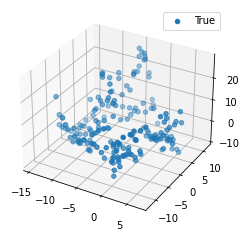

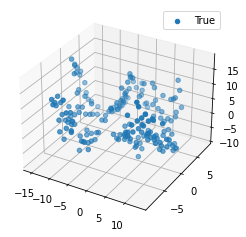

In [5]:
plot_3d(x,y_true[:,0])
plot_3d(x,y_true[:,1])

# Activation Function

In [44]:
class Relu:
  def __call__(self, input_):
    self.input_ = input_
    self.output = tf.clip_by_value(self.input_, clip_value_min=0, clip_value_max=tf.float32.max)
    return self.output

  def backward(self, output_gradient):
    return tf.cast((self.input_ > 0), tf.float32) * output_gradient

# Calculating Mean Squared Error

In [37]:
class MSE:
  def __call__(self, y_true, y_pred):
    self.y_pred = y_pred
    self.y_true = y_true
    return tf.reduce_mean((y_true - y_pred) ** 2)
    
  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2.0 * (self.y_pred - self.y_true) / n
    return self.gradient

# Defining the Linear Model

In [48]:
class Linear:
  def __init__(self, in_dims: int, hidden: int = 1):
    self.weights = tf.Variable(tf.random.uniform(shape=(in_dims, hidden)))
    self.bias = tf.Variable(tf.zeros(shape=(hidden,)))
  
  def __call__(self,x):
    self.x = x
    output = tf.matmul(x, self.weights) + self.bias
    return output
  
  def backward(self, gradient):
    self.weights_gradient = tf.matmul(self.x, gradient, transpose_a=True)
    self.bias_gradient = tf.reduce_sum(gradient, 0)
    self.x_gradient = tf.matmul(gradient, self.weights, transpose_b=True)
    return self.x_gradient
  
  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

# Model using Acivation Function and Linear Layers

In [39]:
class Model:
  def __init__(self, input_dim, hidden_layers):
    self.linear1 = Linear(input_dim, hidden_layers)
    self.relu = Relu()
    self.linear2 = Linear(hidden_layers, 10)
    self.relu = Relu()
    self.linear3 = Linear(10, 2)

  def __call__(self, x):
    l1 = self.linear1(x)
    r1 = self.relu(l1)
    l2 = self.linear2(r1)
    r2 = self.relu(l2)
    l3 = self.linear3(r2)
    return l3

  def backward(self, output_gradient):
    linear3_gradient = self.linear3.backward(output_gradient)
    relu_gradient1 = self.relu.backward(linear3_gradient)
    linear2_gradient = self.linear2.backward(relu_gradient1)
    relu_gradient2 = self.relu.backward(linear2_gradient)
    linear1_gradient = self.linear1.backward(relu_gradient2)
    return linear1_gradient

  def update(self, lr):
    self.linear3.update(lr)
    self.linear2.update(lr)
    self.linear1.update(lr)


# Training Loop

In [40]:
from typing import Callable

def fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    if epoch % 40 == 0:
      print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)

# Evaluating the model

In [50]:
loss = MSE()
model = Model(in_dims,10)
y_pred = model(x)
loss_value=loss(y_pred,y_true)
print(loss_value)

tf.Tensor(98.35325, shape=(), dtype=float32)


# Fitting the data on trained model

In [51]:
fit(x,y_true,loss=loss,model=model,lr=1e-308,num_epochs=100)


Epoch 0, loss 98.3532485961914
Epoch 40, loss 98.3532485961914
Epoch 80, loss 98.3532485961914


# Plotting data post training

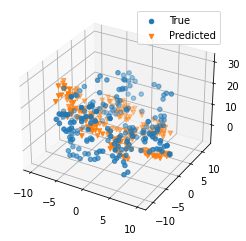

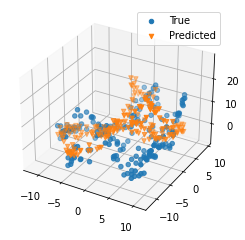

In [53]:
plot_3d(x, y_true[:,0], y_pred[:,0])
plot_3d(x, y_true[:,1], y_pred[:,1])